### 네이버 영화 평점 랭킹 데이터 수집 및 분석

- 접속 주소
> - https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cnt&tg=0&date=19980601
> - 맨뒤에 인자 data값을 부여하면 2005.02.07 ~ 당일 전날 수집가능.
> - 최초에는 누락분 수집하고
> - 운영중에는 매일 1회씩 전달 데이터를 수집하게 스케쥴링


In [1]:
from urllib.request import urlopen
from bs4 import BeautifulSoup
import pandas as pd

In [2]:
domain = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn'
param = '?sel=cur&date=20181010'
page = urlopen(domain + param)
soup = BeautifulSoup(page, 'html.parser')
soup


<!DOCTYPE html>

<html>
<head>
<meta content="text/html; charset=utf-8" http-equiv="Content-Type"/>
<meta content="IE=edge" http-equiv="X-UA-Compatible"/>
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="me2:image">
<meta content="네이버영화 " property="me2:post_tag">
<meta content="네이버영화" property="me2:category1"/>
<meta content="" property="me2:category2"/>
<meta content="랭킹 : 네이버 영화" property="og:title"/>
<meta content="영화, 영화인, 예매, 박스오피스 랭킹 정보 제공" property="og:description"/>
<meta content="article" property="og:type"/>
<meta content="https://movie.naver.com/movie/sdb/rank/rmovie.nhn?sel=cur&amp;date=20181010" property="og:url"/>
<meta content="http://static.naver.net/m/movie/icons/OG_270_270.png" property="og:image"/><!-- http://static.naver.net/m/movie/im/navermovie.jpg -->
<meta content="http://imgmovie.naver.com/today/naverme/naverme_profile.jpg" property="og:article:thumbnailUrl"/>
<meta content="네이버 영화" property="og:article:author"/>
<meta cont

In [3]:
# 당일 영화(현재 상영중인)에 대한 평점 획득
#1. 당일 영화 목록 획득
soup.findAll('div', class_='tit5')


[<div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=168050" title="스타 이즈 본">스타 이즈 본</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=136990" title="인크레더블 2">인크레더블 2</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=175727" title="극장판 헬로카봇 : 백악기 시대">극장판 헬로카봇 : 백악기 시대</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=172174" title="어느 가족">어느 가족</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=164290" title="킹 오브 프리즘 프라이드 더 히어로">킹 오브 프리즘 프라이드 더 히어로</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=174301" title="카메라를 멈추면 안 돼!">카메라를 멈추면 안 돼!</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=152160" title="킹 오브 프리즘">킹 오브 프리즘</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=168023" title="곰돌이 푸 다시 만나 행복해">곰돌이 푸 다시 만나 행복해</a>
 </div>, <div class="tit5">
 <a href="/movie/bi/mi/basic.nhn?code=11307" title="보디가드">보디가드</a>
 </div>, <div class="tit5">

In [4]:
# 한 세트 확인
#print(soup.findAll('div',class_='tit5')[0])
#print('영화제목: [%s]' % soup.findAll('div',class_='tit5')[0].text.strip())
print('영화제목: [%s]' % soup.findAll('div',class_='tit5')[0].a.string)

영화제목: [스타 이즈 본]


In [5]:
# 평점 세트 획득
# 개수가 동일하므로 순서대로 수집해도 상관 없다.
# 가급적이면 돌면서 세트단위를 획득하는데 보다 안정적이다.
print(len(soup.findAll('td', 'point')),len(soup.findAll('div','tit5')))

38 38


In [6]:
#영화 제목만 배열에 모으시오
title_list=[element.text.strip() for element in soup.findAll('div',class_='tit5')]    
# title_list=[element.a.string() for element in soup.findAll('div',class_='tit5')]    

In [7]:
title_list

['스타 이즈 본',
 '인크레더블 2',
 '극장판 헬로카봇 : 백악기 시대',
 '어느 가족',
 '킹 오브 프리즘 프라이드 더 히어로',
 '카메라를 멈추면 안 돼!',
 '킹 오브 프리즘',
 '곰돌이 푸 다시 만나 행복해',
 '보디가드',
 '루이스',
 '맘마미아!2',
 '다음 침공은 어디?',
 '탑건',
 '소공녀',
 '서치',
 '리틀 포레스트',
 '신비아파트: 금빛 도깨비와 비밀의 동굴',
 '어드리프트:우리가 함께한 바다',
 '박화영',
 '너의 결혼식',
 '시카리오: 데이 오브 솔다도',
 '신은 죽지 않았다 3: 어둠 속의 빛',
 '암수살인',
 '죄 많은 소녀',
 '안시성',
 '피아니스트',
 '프란시스 하',
 '베놈',
 '협상',
 '파리로 가는 길',
 '아이 엠 러브',
 '신과함께-인과 연',
 '원더풀 고스트',
 '명당',
 '킬링 디어',
 '더 넌',
 '물괴',
 '상류사회']

In [8]:
#영화 평점만 배열에 모으시오
point_list = [element.text for element in soup.findAll('td', 'point')]

In [9]:
point_list

['9.30',
 '9.26',
 '9.24',
 '9.24',
 '9.20',
 '9.19',
 '9.17',
 '9.05',
 '9.01',
 '9.00',
 '9.00',
 '8.97',
 '8.91',
 '8.88',
 '8.88',
 '8.75',
 '8.74',
 '8.72',
 '8.60',
 '8.54',
 '8.42',
 '8.39',
 '8.35',
 '8.32',
 '8.14',
 '8.11',
 '8.08',
 '8.04',
 '7.93',
 '7.90',
 '7.89',
 '7.72',
 '7.65',
 '7.33',
 '7.08',
 '6.95',
 '5.18',
 '4.30']

In [10]:
# 수집하고자 하는 날짜의 연속 데이터 
pd.date_range('2018-6-1',periods=132, freq='D')

DatetimeIndex(['2018-06-01', '2018-06-02', '2018-06-03', '2018-06-04',
               '2018-06-05', '2018-06-06', '2018-06-07', '2018-06-08',
               '2018-06-09', '2018-06-10',
               ...
               '2018-10-01', '2018-10-02', '2018-10-03', '2018-10-04',
               '2018-10-05', '2018-10-06', '2018-10-07', '2018-10-08',
               '2018-10-09', '2018-10-10'],
              dtype='datetime64[ns]', length=132, freq='D')

In [11]:
# 실습 2018-06-01 어제까지 영화, 평점을 수집하시오
# 진행율을 표시하고
# http://164.125.66.155
movie_dates = []
movie_names = []
movie_points = []

domain = 'https://movie.naver.com/movie/sdb/rank/rmovie.nhn'
param = '?sel=cur&date='

In [12]:
from tqdm import tqdm_notebook

In [13]:
for day in tqdm_notebook(pd.date_range('2018-6-1',periods=133, freq='D')):
    #print(type(day), day.strftime('%Y%m%d'))
    # 요청 url 동적 생성
    url = '%s%s%s' % (domain, param, day.strftime('%Y%m%d'))
    #print(url)
    page = urlopen(url)
    soup = BeautifulSoup(page, 'html.parser')
    #list에 list를 추가시(동일한 차원을 차곡차곡 이어 붙임) extend(iterator 계열 추가시) -> 원래는 리스트 단위로 따닥따닥 붙음
    
    # 영화제목 추출 -> 데이터 담기
    names = [element.text.strip() for element in soup.findAll('div',class_='tit5')]
    movie_names.extend(names)
    # 영화평점 추출 -> 데이터 담기
    points = [element.text for element in soup.findAll('td', 'point')]
    movie_points.extend(points)
    dates = [day for a in range(len(names))]
    movie_dates.extend(dates)
    # 날짜

In [14]:
# 검증
print(len(movie_dates),len(movie_names),len(movie_points))

5791 5791 5791


In [15]:
# 데이터 프레임 생성 => Nan이 0으로 처리됨 (제거됨)
dic = {'data':movie_dates, 'name':movie_names, 'point':movie_points }
movie = pd.DataFrame(dic)
movie.head()

,data,name,point
0,2018-06-01,당갈,9.62
1,2018-06-01,위대한 쇼맨,9.37
2,2018-06-01,킹 오브 프리즘 프라이드 더 히어로,9.26
3,2018-06-01,러빙 빈센트,9.20
4,2018-06-01,댄서,9.11


In [16]:
# point 컬럼을 float형으로 변환
movie['point'] = movie['point'].astype(float)
movie.head()

,data,name,point
0,2018-06-01,당갈,9.62
1,2018-06-01,위대한 쇼맨,9.37
2,2018-06-01,킹 오브 프리즘 프라이드 더 히어로,9.26
3,2018-06-01,러빙 빈센트,9.20
4,2018-06-01,댄서,9.11


In [17]:
import numpy as np

In [18]:
# 영화별 평점의 합계와 평균표시
pi_movie = movie.pivot_table(index='name',aggfunc = [np.sum,np.mean] )
pi_movie.head()

,sum,mean
,point,point
name,,
1987,74.00,9.2500
500일의 썸머,251.55,8.3850
5일의 마중,26.82,8.9400
개들의 섬,454.87,8.7475
건축학개론,198.95,8.6500


In [19]:
pi_movie.columns = ['sum','mean']

In [20]:
pi_movie.head(2)

,sum,mean
name,,
1987,74.00,9.250
500일의 썸머,251.55,8.385


In [21]:
pi_movie_mean = pi_movie.sort_values(by = 'mean', ascending=False)

In [22]:
pi_movie_mean.head()

,sum,mean
name,,
아일라,515.98,9.555185
당갈,1050.80,9.552727
덕구,18.96,9.480000
허스토리,640.79,9.423382
원더,188.24,9.412000


In [23]:
pi_movie_sum = pi_movie.sort_values(by = 'sum', ascending=False)
pi_movie_sum.head()

,sum,mean
name,,
소공녀,1154.48,8.880615
당갈,1050.80,9.552727
어벤져스: 인피니티 워,976.77,8.961193
시카리오: 데이 오브 솔다도,901.08,8.500755
걸어도 걸어도,855.75,8.643939


In [24]:
# 특정 영화만 모은다 : 어벤저스 : 인피니티워
tmp = movie.query("name == ['어벤져스: 인피니티 워']")
tmp

,data,name,point
9,2018-06-01,어벤져스: 인피니티 워,8.97
38,2018-06-02,어벤져스: 인피니티 워,8.97
67,2018-06-03,어벤져스: 인피니티 워,8.96
96,2018-06-04,어벤져스: 인피니티 워,8.96
124,2018-06-05,어벤져스: 인피니티 워,8.96
150,2018-06-06,어벤져스: 인피니티 워,8.97
178,2018-06-07,어벤져스: 인피니티 워,8.97
205,2018-06-08,어벤져스: 인피니티 워,8.97
235,2018-06-09,어벤져스: 인피니티 워,8.97
265,2018-06-10,어벤져스: 인피니티 워,8.97


In [25]:
import matplotlib.pyplot as plt
% matplotlib inline

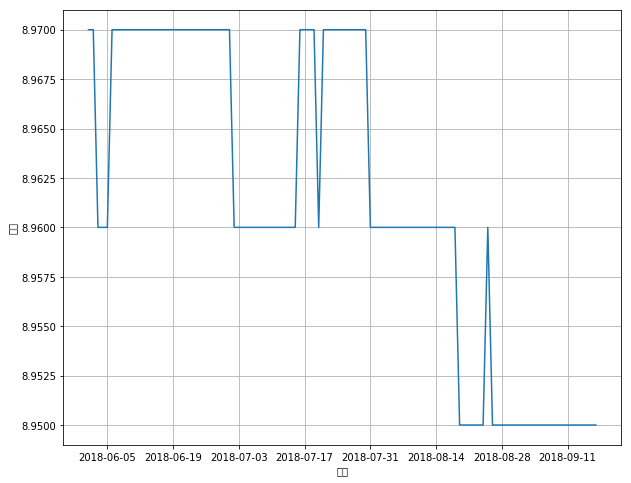

In [28]:
plt.figure(figsize=(10,8))
#값
#x축 : 날짜 
#y축 : 평점
plt.plot(tmp['data'],tmp['point'])
#특정 영역 or 확대 좁혀서 확인
#데코
plt.grid()
plt.xlabel('날짜')
plt.ylabel('평점')
plt.ylim(tmp['point'].min()-0.001, tmp['point'].max()+0.001)

# 보이기
plt.show()

In [29]:
tmp.head()

,data,name,point
9,2018-06-01,어벤져스: 인피니티 워,8.97
38,2018-06-02,어벤져스: 인피니티 워,8.97
67,2018-06-03,어벤져스: 인피니티 워,8.96
96,2018-06-04,어벤져스: 인피니티 워,8.96
124,2018-06-05,어벤져스: 인피니티 워,8.96


In [30]:
tmp.set_index('data').head()

,name,point
data,,
2018-06-01,어벤져스: 인피니티 워,8.97
2018-06-02,어벤져스: 인피니티 워,8.97
2018-06-03,어벤져스: 인피니티 워,8.96
2018-06-04,어벤져스: 인피니티 워,8.96
2018-06-05,어벤져스: 인피니티 워,8.96


In [31]:
# 1. 인덱스, 날짜, 칼럼은 이름, 값은 포인트로하여 데이터프레임 생성
# 2. 컬럼 필요하면 레벨 조정
# 3. X 축 날짜, Y축은 평점으로 해서, 상위 5개 영화만 시각화

In [32]:
movie.head()

,data,name,point
0,2018-06-01,당갈,9.62
1,2018-06-01,위대한 쇼맨,9.37
2,2018-06-01,킹 오브 프리즘 프라이드 더 히어로,9.26
3,2018-06-01,러빙 빈센트,9.20
4,2018-06-01,댄서,9.11


In [33]:
movie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5791 entries, 0 to 5790
Data columns (total 3 columns):
data     5791 non-null datetime64[ns]
name     5791 non-null object
point    5791 non-null float64
dtypes: datetime64[ns](1), float64(1), object(1)
memory usage: 135.8+ KB


In [36]:
movie_pivot=pd.pivot_table(movie, index =['data'], columns = ['name'],values = ['point'])

In [37]:
movie_pivot.head()

point                                                        \
name        1987 500일의 썸머 5일의 마중 개들의 섬 건축학개론 걸어도 걸어도 게이트 경성학교: 사라진 소녀들   
data                                                                     
2018-06-01   NaN      NaN    NaN   NaN   NaN     NaN NaN           NaN   
2018-06-02   NaN      NaN    NaN   NaN   NaN     NaN NaN           NaN   
2018-06-03   NaN      NaN    NaN   NaN   NaN     NaN NaN           NaN   
2018-06-04   NaN      NaN    NaN   NaN   NaN     NaN NaN           NaN   
2018-06-05   NaN      NaN    NaN   NaN   NaN     NaN NaN           NaN   

                           ...                                      \
name       고양이를 빌려드립니다 곤지암 ... 피터 래빗 한 솔로: 스타워즈 스토리 한여름의 판타지아 허스토리   
data                       ...                                       
2018-06-01         NaN NaN ...  9.10           7.96       NaN  NaN   
2018-06-02         NaN NaN ...  9.07           7.95       NaN  NaN   
2018-06-03         NaN NaN ...  9.06           7.97       NaN  NaN   
2018-06-04         NaN NaN ...  9.05           7.96       NaN  NaN   
2018-06-05         NaN NaN ...  9.04           7.96       NaN  NaN   

                                                      
name       혐오스런 마츠코의 일생  협상 호텔 아르테미스 환상의 빛 훌라 걸스 휘트니  
data                                                  
2018-06-01          NaN NaN      NaN   NaN   NaN NaN  
2018-06-02          NaN NaN      NaN   NaN   NaN NaN  
2018-06-03          NaN NaN      NaN   NaN   NaN NaN  
2018-06-04          NaN NaN      NaN   NaN   NaN NaN  
2018-06-05          NaN NaN      NaN   NaN   NaN NaN  

[5 rows x 228 columns]

In [38]:
pi_movie_mean.index[:5]

Index(['아일라', '당갈', '덕구', '허스토리', '원더'], dtype='object', name='name')

In [39]:
movie_pivot.columns = movie_pivot.columns.droplevel()

In [40]:
pi_movie_mean.index[:5]

Index(['아일라', '당갈', '덕구', '허스토리', '원더'], dtype='object', name='name')

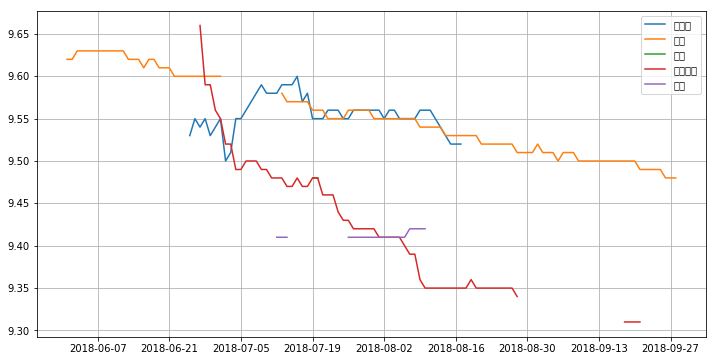

In [41]:
target_col=pi_movie_mean.index[:5]
plt.figure(figsize= (12,6))
plt.plot(movie_pivot[target_col])

plt.legend(target_col,loc='best')
plt.grid()
plt.show()


In [ ]:
movie_copy = movie[:]
movie_copy.set_index('data',inplace=True)
movie_copy.columns=['이름','포인트']

In [ ]:
movie_copy.head()

In [ ]:
movie_csort=movie_copy.sort_values('포인트',ascending=False)
movie_csort.head()

In [ ]:
import numpy as np

In [ ]:
plt.figure(figsize=(15,5))
plt.scatter(movie_csort[:5].index,movie_csort[:5]['포인트'])

In [ ]:
movie_csort[:5].index

In [ ]:
movie_csort[:5]

In [ ]:
movie_csort[:5]['이름']